# Intermediate Python

_DataCamp Course - Oct 2022_

## Matplotlib
Matplotlib is a python library for data visualization. 
Here is a [cheat sheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png) for using the library.

### Data Visualization of Gapminder data
Below is an example of the library using the gapminder data to show the relation between life expectancy and GDP per capita for all countries in 2007

In [45]:
from gapminder import gapminder
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [46]:
gapminder_2007 = gapminder[gapminder.year == 2007]
gapminder_2007.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
23,Albania,Europe,2007,76.423,3600523,5937.029526
35,Algeria,Africa,2007,72.301,33333216,6223.367465
47,Angola,Africa,2007,42.731,12420476,4797.231267
59,Argentina,Americas,2007,75.320,40301927,12779.379640


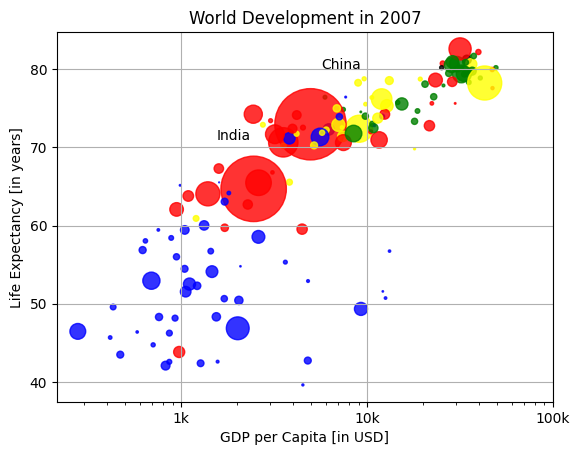

{'Asia': 'red', 'Europe': 'green', 'Africa': 'blue', 'Americas': 'yellow', 'Oceania': 'black'}


In [47]:
import matplotlib.pyplot as plt

gdp_cap = gapminder_2007.gdpPercap
life_exp = gapminder_2007.lifeExp
pop = gapminder_2007['pop']

colors_map = {
    'Asia': 'red',
    'Europe': 'green',
    'Africa': 'blue',
    'Americas': 'yellow',
    'Oceania': 'black'
}

colors = list(gapminder_2007.continent.replace(colors_map))

# Reset plot to start from scratch
plt.clf()

# Add grid() call
plt.grid(True)

# Scatter plot
plt.scatter(
    x = gdp_cap,
    y = life_exp,
    s = pop * 2 / 1_000_000,
    c = colors,
    alpha = 0.8
)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

# Show the plot
plt.show()
print(colors_map)

## Dictionaries

Dictionaries are python name for key-value pairs data structure, like hashmaps or ruby hashes.

In [48]:
# Definition of dictionary
europe = {'spain':'madrid', 'france':'paris', 'germany':'berlin', 'norway':'oslo' }

# Add italy to europe
europe['italy'] = 'rome'

# Print out italy in europe
print('italy' in europe)

# Add poland to europe
europe['poland'] = 'warsaw'

# Remove norway
del(europe['norway'])

# Print europe
print(europe)

# Dictionary of dictionaries
europe = { 'spain': { 'capital':'madrid', 'population':46.77 },
           'france': { 'capital':'paris', 'population':66.03 },
           'germany': { 'capital':'berlin', 'population':80.62 },
           'norway': { 'capital':'oslo', 'population':5.084 } }

# Create sub-dictionary data
data = { 'capital': 'london', 'population': 59.83 }

# Add data to europe under key 'italy'
europe['england'] = data

# Print europe
print(europe)

True
{'spain': 'madrid', 'france': 'paris', 'germany': 'berlin', 'italy': 'rome', 'poland': 'warsaw'}
{'spain': {'capital': 'madrid', 'population': 46.77}, 'france': {'capital': 'paris', 'population': 66.03}, 'germany': {'capital': 'berlin', 'population': 80.62}, 'norway': {'capital': 'oslo', 'population': 5.084}, 'england': {'capital': 'london', 'population': 59.83}}


### Pandas

Pandas is a Python library that provides tools for data manipulation, especially large amounts of data which is the common scenario on data science. Pandas provides a data type called `DataFrame`. A `DataFrame` is a representation of tabular data, where there are multiple columns (also called variables), and multiple rows (also called observations). The values on each column must be of the same data type.

#### Creating a DataFrame from a dictionary

In [49]:
# Import pandas
import pandas as pd

# Pre-defined lists
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]

# Create dictionary my_dict with three key:value pairs: my_dict
my_dict = {
    'country': names,
    'drives_right': dr,
    'cars_per_cap': cpc
}

# Build a DataFrame cars from my_dict: cars
cars = pd.DataFrame(my_dict)

# Print cars
print(cars)

         country  drives_right  cars_per_cap
0  United States          True           809
1      Australia         False           731
2          Japan         False           588
3          India         False            18
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45


Row labels can be renamed to override the default values, which are shown above as 0, 1, 2...6

In [50]:
# Definition of row_labels
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']

# Specify row labels of cars
cars.index = row_labels

# Print cars again
print(cars)

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588
IN           India         False            18
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


### Accessing DataFrames

DataFrames data can be accessed using square brackets in 2 different ways:

In [51]:
# Print out country column as Pandas Series
print(cars['country'])

US     United States
AUS        Australia
JPN            Japan
IN             India
RU            Russia
MOR          Morocco
EG             Egypt
Name: country, dtype: object


In [52]:
# Print out country column as Pandas DataFrame
print(cars[['country']])

           country
US   United States
AUS      Australia
JPN          Japan
IN           India
RU          Russia
MOR        Morocco
EG           Egypt


In [53]:
# Print out DataFrame with country and drives_right columns
print(cars[['country', 'drives_right']])

           country  drives_right
US   United States          True
AUS      Australia         False
JPN          Japan         False
IN           India         False
RU          Russia          True
MOR        Morocco          True
EG           Egypt          True


To get specific rows, brackets can be used in the following way:

In [54]:
# Print out first 3 observations
print(cars[0:3])

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588


In [55]:
# Print out the country and cars_per_cap of the first 3 observations
print(cars[0:3][['country', 'cars_per_cap']])

           country  cars_per_cap
US   United States           809
AUS      Australia           731
JPN          Japan           588


Using `loc` and `iloc`:

In [56]:
# Print out observation for Japan
print(cars.loc['JPN'])

country         Japan
drives_right    False
cars_per_cap      588
Name: JPN, dtype: object


In [57]:
# Print out observations for Australia and Egypt
print(cars.loc[['AUS', 'EG']])

       country  drives_right  cars_per_cap
AUS  Australia         False           731
EG       Egypt          True            45


In [58]:
# iloc is index-based
print(cars.iloc[0])

country         United States
drives_right             True
cars_per_cap              809
Name: US, dtype: object


`loc` and `iloc` can also help slicing rows and columns

In [59]:
# Print out drives_right value of Morocco
print(cars.loc['MOR', 'drives_right'])

True


In [60]:
# Print sub-DataFrame
print(cars.loc[['RU', 'MOR'], ['country', 'drives_right']])

     country  drives_right
RU    Russia          True
MOR  Morocco          True


In [61]:
# Print out drives_right column as Series
print(cars.loc[:, 'drives_right'])

US      True
AUS    False
JPN    False
IN     False
RU      True
MOR     True
EG      True
Name: drives_right, dtype: bool


In [62]:
# Print out drives_right column as DataFrame
print(cars.loc[:, ['drives_right']])

     drives_right
US           True
AUS         False
JPN         False
IN          False
RU           True
MOR          True
EG           True


In [63]:
# Print out cars_per_cap and drives_right as DataFrame
print(cars.loc[:, ['cars_per_cap', 'drives_right']])

     cars_per_cap  drives_right
US            809          True
AUS           731         False
JPN           588         False
IN             18         False
RU            200          True
MOR            70          True
EG             45          True


### Filtering

Filtering can be done by mixing up the syntax above with logical conditions

In [64]:
# Extract drives_right column as Series: dr
dr = cars['drives_right']

# Use dr to subset cars: sel
sel = cars[dr == True]

# Print sel
print(sel)

           country  drives_right  cars_per_cap
US   United States          True           809
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


In panda's series and numpy arrays, to use logical operators such as AND, OR and NOT numpy provides the `logical_and`, `logical_or` and `logical_not` functions

In [65]:
# import numpy
import numpy as np

# Create medium: observations with cars_per_cap between 100 and 500
medium = cars[np.logical_and(
    cars['cars_per_cap'] > 100,
    cars['cars_per_cap'] < 500
)]

# Print medium
print(medium)


   country  drives_right  cars_per_cap
RU  Russia          True           200


### Looping over a DataFrame

A simple `for` loop over a DataFrame will print the column names

In [66]:
# Iterate over column names
for column in cars :
    print(column)

country
drives_right
cars_per_cap


A more useful scenario is to iterate over rows. The `iterrows` method must be used for that

In [67]:
for lab, row in cars.iterrows() :
    print(f'Row label: {lab}')
    print(row)
    print()

Row label: US
country         United States
drives_right             True
cars_per_cap              809
Name: US, dtype: object

Row label: AUS
country         Australia
drives_right        False
cars_per_cap          731
Name: AUS, dtype: object

Row label: JPN
country         Japan
drives_right    False
cars_per_cap      588
Name: JPN, dtype: object

Row label: IN
country         India
drives_right    False
cars_per_cap       18
Name: IN, dtype: object

Row label: RU
country         Russia
drives_right      True
cars_per_cap       200
Name: RU, dtype: object

Row label: MOR
country         Morocco
drives_right       True
cars_per_cap         70
Name: MOR, dtype: object

Row label: EG
country         Egypt
drives_right     True
cars_per_cap       45
Name: EG, dtype: object



### Adding or modifying columns

The assignment operator can be used to create a new column on the DataFrame or edit an existing one. The `apply` method can be used to pass a callback and apply it to every row of an existing Series

In [68]:
# Use .apply(str.upper)
cars['COUNTRY'] = cars['country'].apply(str.upper)

print(cars)

           country  drives_right  cars_per_cap        COUNTRY
US   United States          True           809  UNITED STATES
AUS      Australia         False           731      AUSTRALIA
JPN          Japan         False           588          JAPAN
IN           India         False            18          INDIA
RU          Russia          True           200         RUSSIA
MOR        Morocco          True            70        MOROCCO
EG           Egypt          True            45          EGYPT
